In [2]:
import numpy as np
import pandas as pd



In [3]:
def plot_list(list_of_dfs, subplot_shape, title, xlabel, ylabel, legend, save_path, log_scale=False):
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots(subplot_shape[0], subplot_shape[1], figsize=(20, 10))
    for i,df in enumerate(list_of_dfs):
        ax[i].plot(df)
        ax[i].set_xlabel(xlabel)
        ax[i].set_ylabel(ylabel)
        ax[i].set_title(title)
        ax[i].legend(legend)
    if log_scale:
        ax.set_yscale('log')
    #plt.savefig(save_path)
    plt.show()

In [20]:
def plot_dfs_matrix(list_of_dfs, subplot_shape, title, xlabel, ylabel, legend, save_path, log_scale=False):
    import matplotlib.pyplot as plt
    

    fig, ax = plt.subplots(subplot_shape[0], subplot_shape[1], figsize=(20, 10))
    for i,_ in enumerate(list_of_dfs):
        for j,df in enumerate(list_of_dfs[i]):
            ylab = ylabel[i]
            ax[i].plot(df)
            ax[i].set_xlabel(xlabel)
            ax[i].set_ylabel(ylab)
            ax[i].set_title(title)
            ax[i].legend(legend)
            if log_scale:
                ax[i].set_yscale('log')
    #plt.savefig(save_path)
    plt.show()

This file plots selected lightning metrics.csv and saves them as .pdf in plots/ folder.


In [14]:

def load_csv(path):
    """Load a csv file."""
    return pd.read_csv(path,sep=',',na_values='nan')

def plot_row(row):
    """Plot a row."""
    plt.plot(np.arange(len(row)),row)

data = load_csv('version_20'+'/metrics.csv')

import matplotlib.pyplot as plt

plt.style.use(style='default')
data.columns


Index(['train_loss_step', 'train_mcc_step', 'train_acc_step',
       'train_precision_step', 'train_recall_step', 'epoch', 'step',
       'val_loss_step', 'val_mcc_step', 'val_acc_step', 'val_precision_step',
       'val_recall_step', 'val_loss_epoch', 'val_mcc_epoch', 'val_acc_epoch',
       'val_precision_epoch', 'val_recall_epoch', 'train_loss_epoch',
       'train_mcc_epoch', 'train_acc_epoch', 'train_precision_epoch',
       'train_recall_epoch'],
      dtype='object')

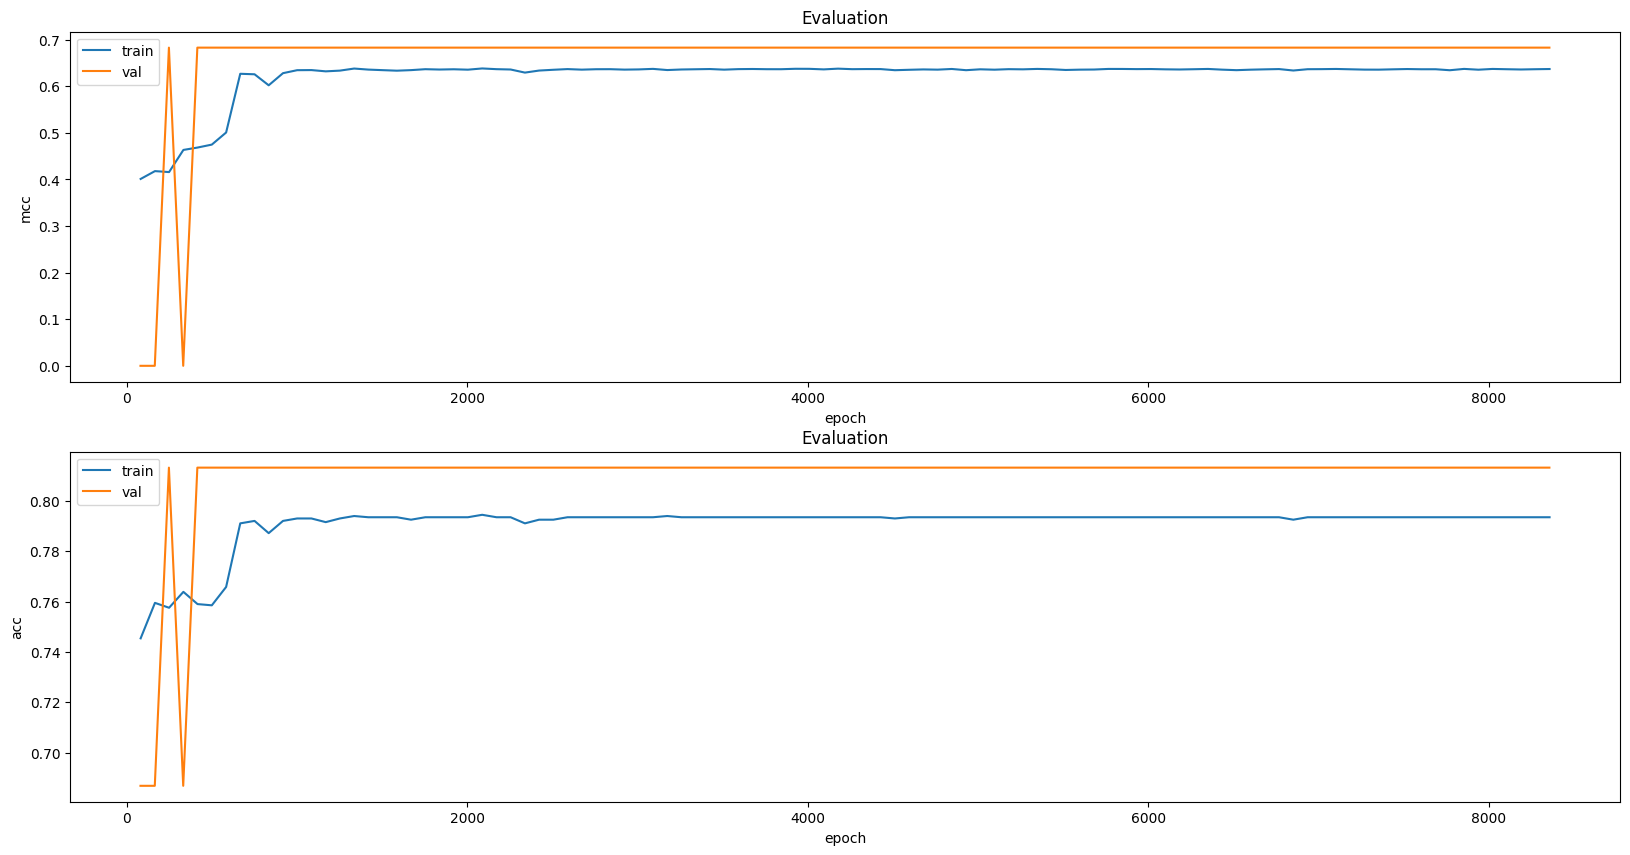

In [25]:

data = load_csv('version_18'+'/metrics.csv')
# plot_list([data['train_acc_epoch'].dropna(),data['val_acc_epoch'].dropna()],subplot_shape=(2,1),title='Loss',xlabel='Epoch',ylabel='Loss',legend=['train','val'],save_path='../plots/model'+'/loss_0.png')
plot_dfs_matrix([[data['train_mcc_epoch'].dropna(),data['val_mcc_epoch'].dropna()],[data['train_acc_epoch'].dropna(),data['val_acc_epoch'].dropna()]],subplot_shape=(2,1),title='Evaluation',ylabel=['mcc','acc'],xlabel='epoch',legend=['train','val'],save_path='../plots/model'+'/loss_0.png')